# Import libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Reading the CSV files

In [88]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Quick inspection

In [89]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [90]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [91]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


# Preprocessing

## Merge datasets together

In [92]:
merged_df = transactions.merge(customers, on="CustomerID", how="left").merge(
    products, on="ProductID", how="left"
)

## Convert dates to datetime

In [93]:
merged_df["TransactionDate"] = pd.to_datetime(merged_df["TransactionDate"])
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])

# Exploratory Data Analysis

## Basic summary statistics

In [94]:
merged_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [95]:
merged_df.describe()

,TransactionDate,Quantity,TotalValue,Price_x,Price_y
count,1000,1000.000000,1000.000000,1000.00000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000,497.76000
std,NaN,1.117981,493.144478,140.73639,140.73639


## Check for missing values

In [96]:
merged_df.isna().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

## Explore sales data by region

### Total Sales by Region

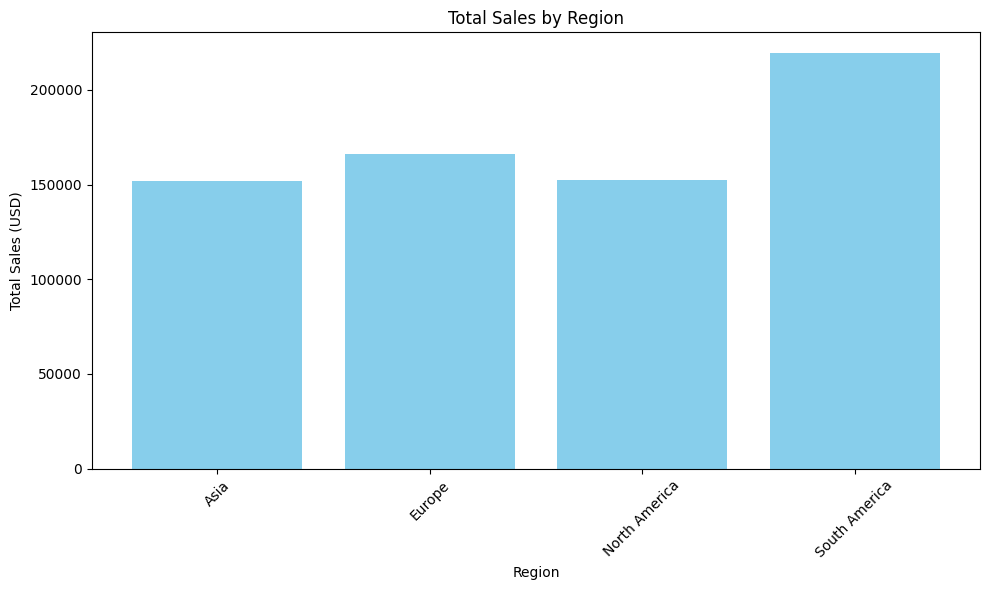

In [97]:
# Calculate sales statistics by region
sales_stats = (
    merged_df.groupby("Region")
    .agg(
        {
            "TotalValue": ["count", "sum", "mean", "median", "std"],
            "Quantity": ["sum", "mean"],
        }
    )
    .round(2)
)

# Rename columns for clarity
sales_stats.columns = [
    "Transaction_Count",
    "Total_Sales",
    "Avg_Transaction_Value",
    "Median_Transaction_Value",
    "Std_Transaction_Value",
    "Total_Quantity",
    "Avg_Quantity",
]


plt.figure(figsize=(10, 6))
plt.bar(sales_stats.index, sales_stats['Total_Sales'], color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Sales Statistics for each Region:

In [98]:
sales_stats = sales_stats.sort_values("Total_Sales", ascending=False)

sales_stats

,Transaction_Count,Total_Sales,Avg_Transaction_Value,Median_Transaction_Value,Std_Transaction_Value,Total_Quantity,Avg_Quantity
Region,,,,,,,
South America,304,219352.56,721.55,611.32,521.43,789,2.60
Europe,234,166254.63,710.49,596.58,508.74,595,2.54
North America,244,152313.40,624.24,456.92,449.94,593,2.43
Asia,218,152074.97,697.59,612.76,478.09,560,2.57


### Transaction value distribution by region

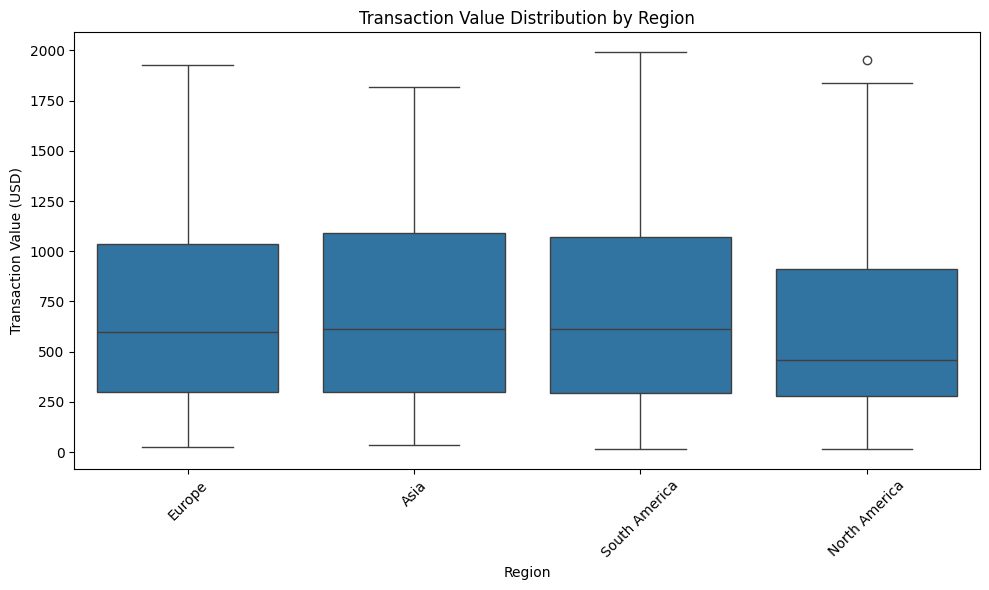

In [99]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x="Region", y="TotalValue")
plt.title("Transaction Value Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Transaction Value (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Percentage of total sales by region

In [100]:
sales_percentage = (
    sales_stats["Total_Sales"] / sales_stats["Total_Sales"].sum() * 100
).round(2)
print("\nPercentage of Total Sales by Region:")
sales_percentage


Percentage of Total Sales by Region:


Region
South America    31.79
Europe           24.10
North America    22.07
Asia             22.04
Name: Total_Sales, dtype: float64

## Top products analysis

### Top 10 products overall

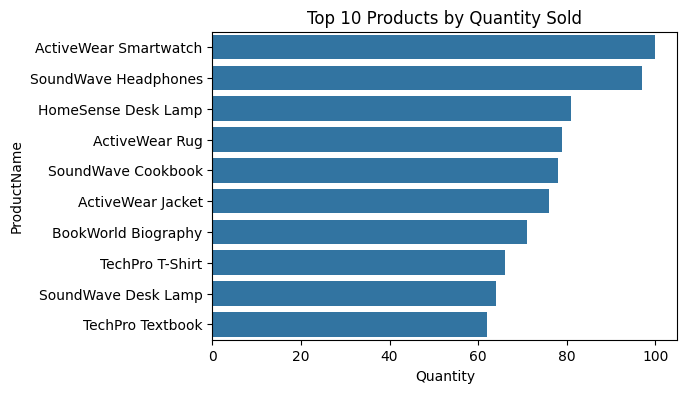

In [101]:
top_products = (
    merged_df.groupby("ProductName")["Quantity"]
    .sum()
    .reset_index()
    .sort_values("Quantity", ascending=False)
    .head(10)
)
plt.figure(figsize=(6, 4))
sns.barplot(data=top_products, x="Quantity", y="ProductName")
plt.title("Top 10 Products by Quantity Sold")
plt.show()

### Top 5 products by region

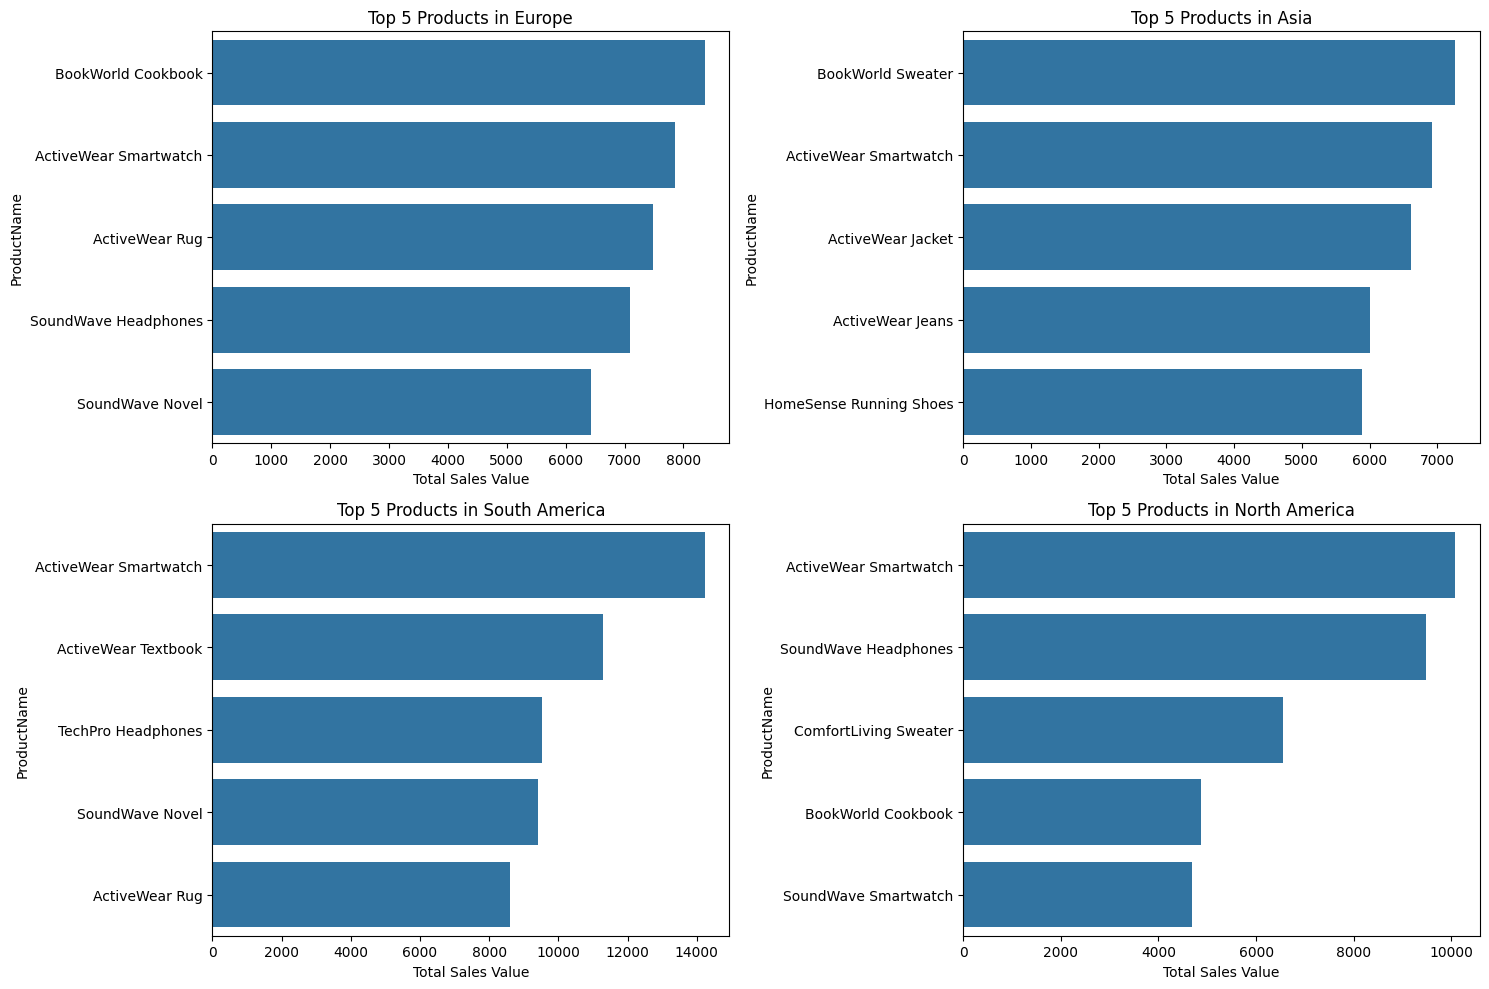

In [102]:
def analyze_region_products(df, region=None, top_n=5):
    if region:
        df = df[df["Region"] == region]

    # Aggregate by product
    product_stats = (
        df.groupby(["ProductName", "Category"])
        .agg({"TotalValue": "sum", "Quantity": "sum"})
        .reset_index()
    )

    return product_stats.sort_values("TotalValue", ascending=False).head(top_n)


regions = merged_df["Region"].unique()
region_analysis = {}

for region in regions:
    region_analysis[region] = analyze_region_products(merged_df, region)

plt.figure(figsize=(15, 10))
for idx, region in enumerate(regions, 1):
    plt.subplot(2, 2, idx)
    data = region_analysis[region]
    sns.barplot(data=data, x="TotalValue", y="ProductName")
    plt.title(f"Top 5 Products in {region}")
    plt.xlabel("Total Sales Value")
    plt.tight_layout()
plt.show()

### Category analysis by region

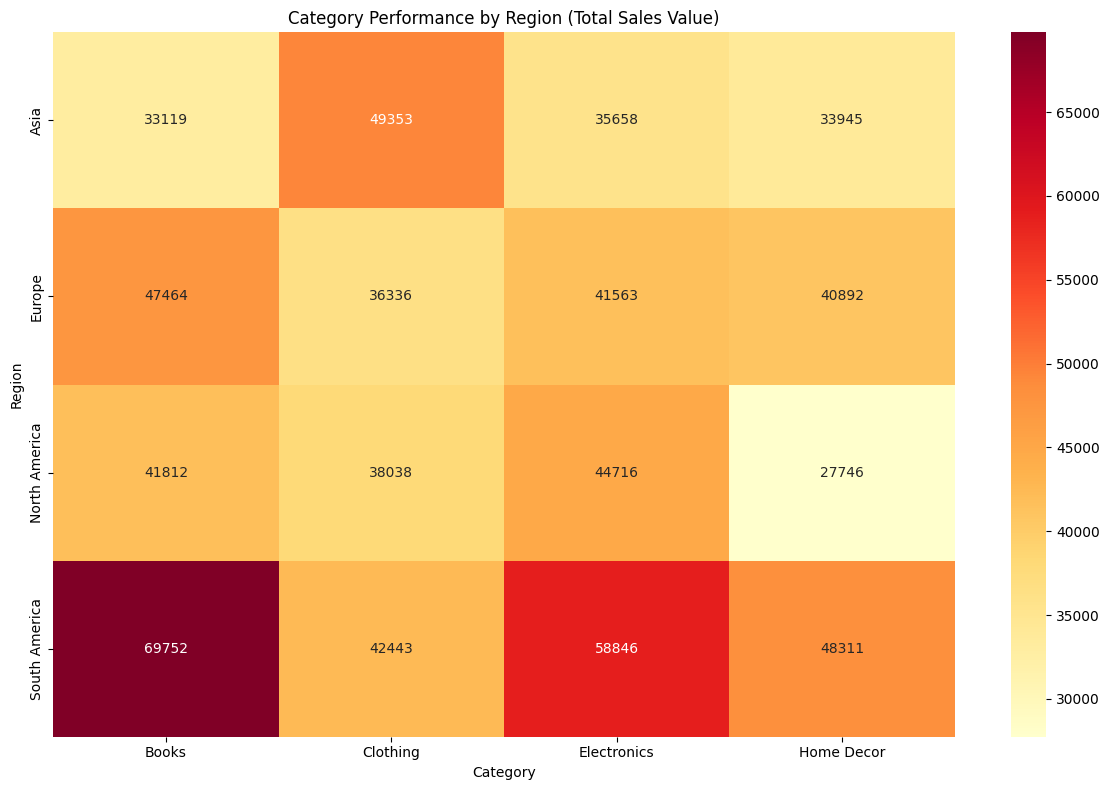

In [103]:
category_analysis = (
    merged_df.groupby(["Region", "Category"])
    .agg({"TotalValue": "sum", "Quantity": "sum"})
    .reset_index()
)

category_pivot = category_analysis.pivot(
    index="Region", columns="Category", values="TotalValue"
).fillna(0)

# Heatmap of category performance by region
plt.figure(figsize=(12, 8))
sns.heatmap(category_pivot, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Category Performance by Region (Total Sales Value)")
plt.tight_layout()
plt.show()

## Sales time analysis

In [104]:
# Extract various datetime components
transactions["Year"] = transactions["TransactionDate"].dt.year
transactions["Month"] = transactions["TransactionDate"].dt.month_name()
transactions["DayOfWeek"] = transactions["TransactionDate"].dt.day_name()
transactions["Hour"] = transactions["TransactionDate"].dt.hour

In [105]:
# Monthly Analysis
monthly_sales = (
    transactions.groupby("Month")["TotalValue"].agg(["sum", "count", "mean"]).round(2)
)
monthly_sales = monthly_sales.reindex(
    [
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ]
)

In [106]:
# Daily Analysis
daily_sales = (
    transactions.groupby("DayOfWeek")["TotalValue"]
    .agg(["sum", "count", "mean"])
    .round(2)
)
daily_sales = daily_sales.reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

In [107]:
# Hourly Analysis
hourly_sales = transactions.groupby("Hour")["TotalValue"].sum().round(2)

### Monthly, Daily and Hourly sales

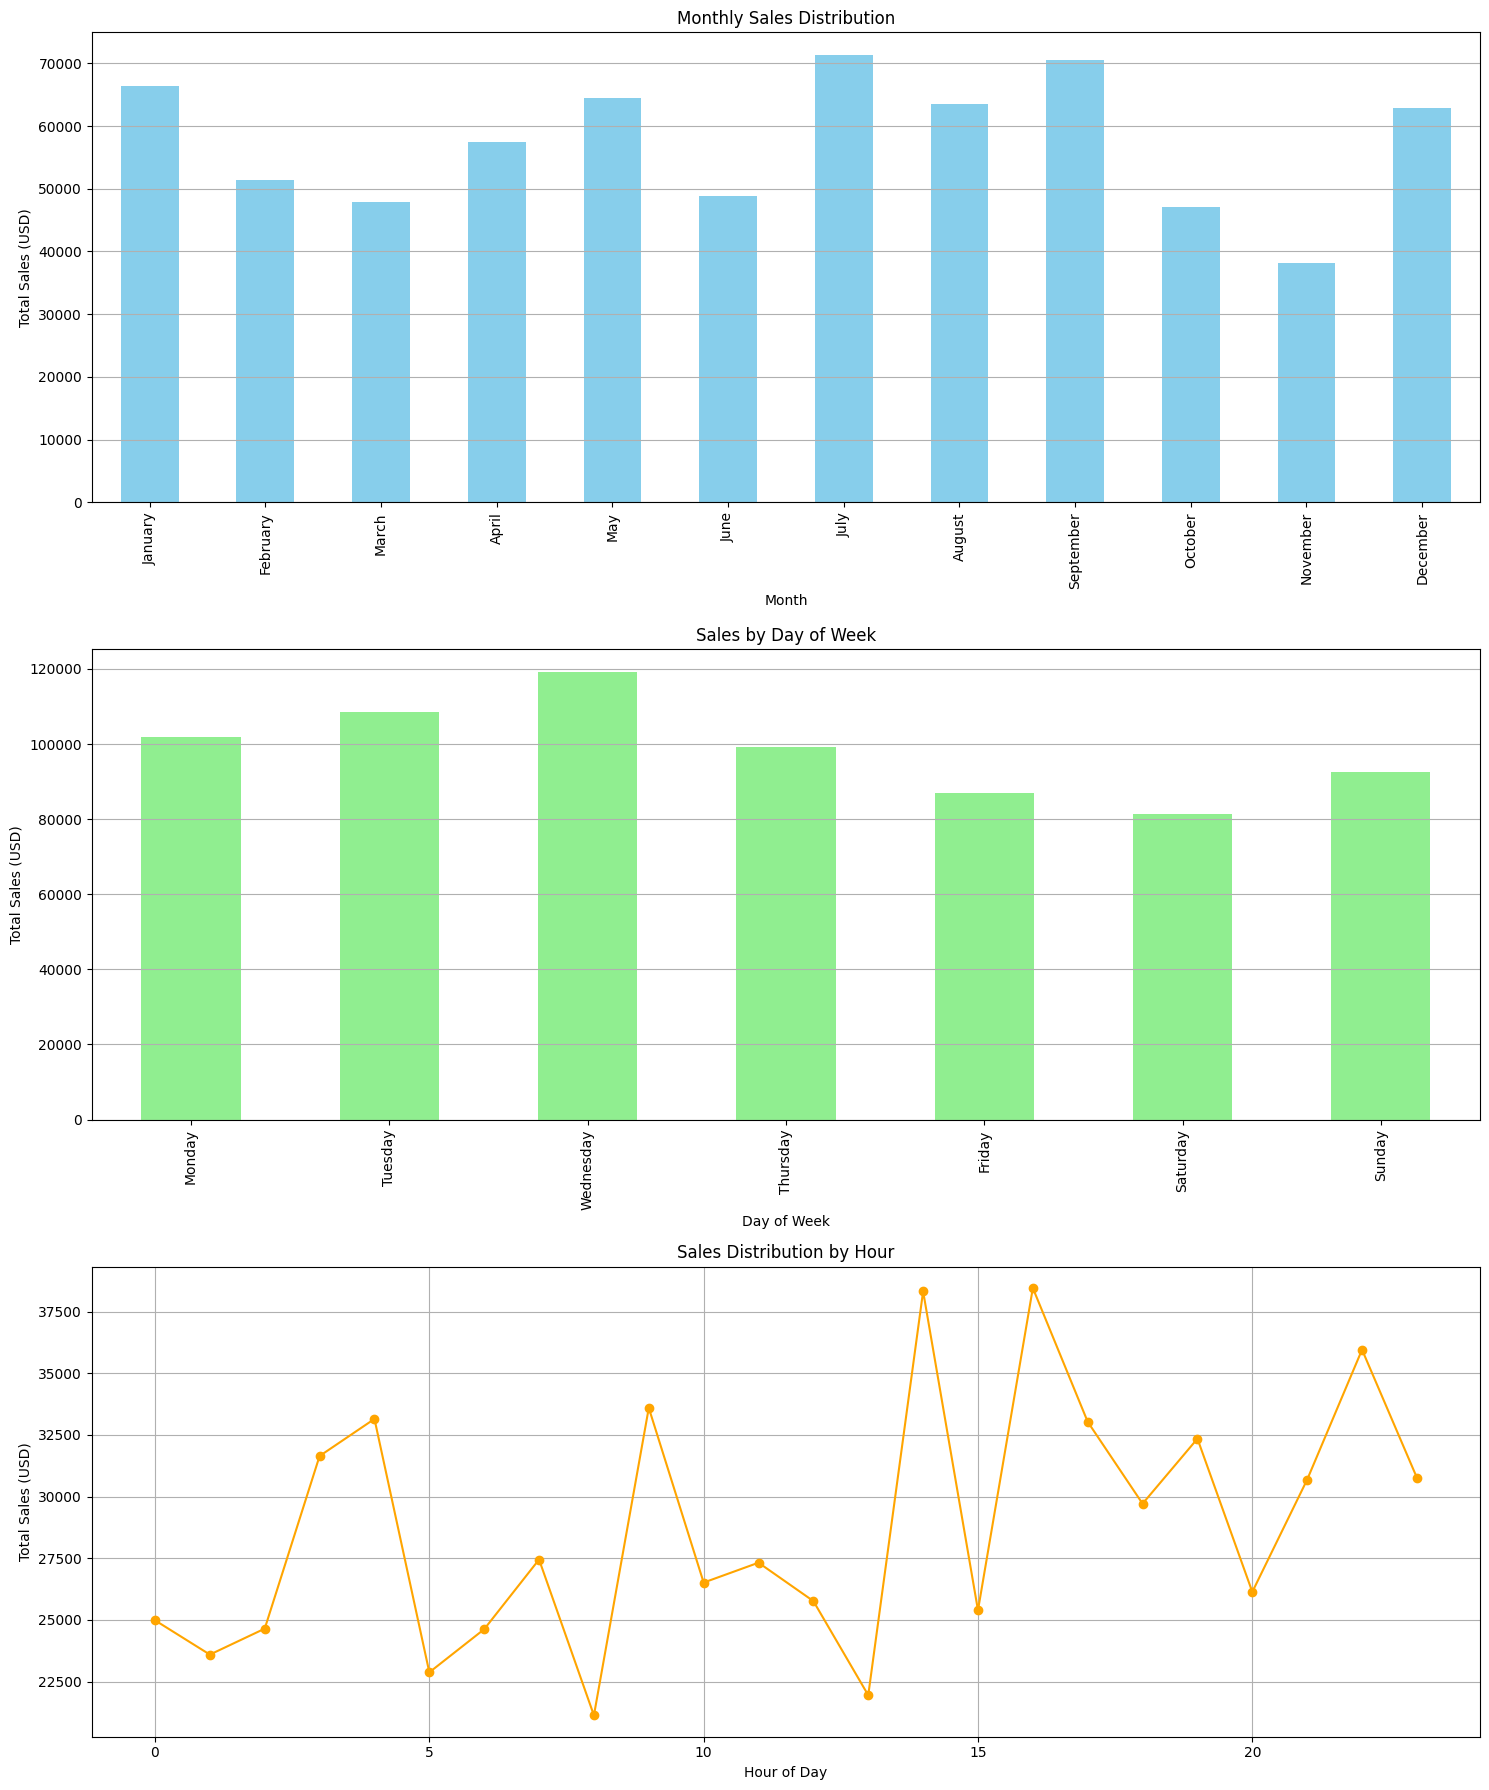

In [108]:
def plot_sales_analysis():
    # Create a figure with 3 subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 18))

    # Monthly Sales Plot
    monthly_sales["sum"].plot(kind="bar", ax=ax1, color="skyblue")
    ax1.set_title("Monthly Sales Distribution")
    ax1.set_xlabel("Month")
    ax1.set_ylabel("Total Sales (USD)")
    ax1.grid(True, axis="y")

    # Daily Sales Plot
    daily_sales["sum"].plot(kind="bar", ax=ax2, color="lightgreen")
    ax2.set_title("Sales by Day of Week")
    ax2.set_xlabel("Day of Week")
    ax2.set_ylabel("Total Sales (USD)")
    ax2.grid(True, axis="y")

    # Hourly Sales Plot
    hourly_sales.plot(kind="line", marker="o", ax=ax3, color="orange")
    ax3.set_title("Sales Distribution by Hour")
    ax3.set_xlabel("Hour of Day")
    ax3.set_ylabel("Total Sales (USD)")
    ax3.grid(True)

    plt.tight_layout()
    plt.show()

plot_sales_analysis()

In [109]:
def calculate_peak_statistics():
    # Peak month
    peak_month = monthly_sales["sum"].idxmax()
    peak_month_sales = monthly_sales.loc[peak_month, "sum"]

    # Peak day
    peak_day = daily_sales["sum"].idxmax()
    peak_day_sales = daily_sales.loc[peak_day, "sum"]

    # Peak hour
    peak_hour = hourly_sales.idxmax()
    peak_hour_sales = hourly_sales[peak_hour]

    # Average transaction value by timeframe
    avg_transaction_by_month = monthly_sales["mean"]
    avg_transaction_by_day = daily_sales["mean"]

    return {
        "peak_month": {"month": peak_month, "sales": peak_month_sales},
        "peak_day": {"day": peak_day, "sales": peak_day_sales},
        "peak_hour": {"hour": peak_hour, "sales": peak_hour_sales},
        "avg_transaction_month": avg_transaction_by_month,
        "avg_transaction_day": avg_transaction_by_day,
    }

### Peak sales analysis

In [110]:
stats = calculate_peak_statistics()

# Print summary statistics
print("\nPeak Sales Statistics:")
print(
    f"Peak Month: {stats['peak_month']['month']} (${stats['peak_month']['sales']:,.2f})"
)
print(f"Peak Day: {stats['peak_day']['day']} (${stats['peak_day']['sales']:,.2f})")
print(
    f"Peak Hour: {stats['peak_hour']['hour']:02d}:00 (${stats['peak_hour']['sales']:,.2f})"
)


Peak Sales Statistics:
Peak Month: July ($71,366.39)
Peak Day: Wednesday ($119,203.15)
Peak Hour: 16:00 ($38,455.39)


### Busy hours analysis

In [111]:
morning_sales = hourly_sales[6:12].sum()
afternoon_sales = hourly_sales[12:17].sum()
evening_sales = hourly_sales[17:22].sum()
night_sales = hourly_sales[[*range(22, 24), *range(0, 6)]].sum()

print("\nSales by Time Period:")
print(f"Morning (6AM-12PM): ${morning_sales:,.2f}")
print(f"Afternoon (12PM-5PM): ${afternoon_sales:,.2f}")
print(f"Evening (5PM-10PM): ${evening_sales:,.2f}")
print(f"Night (10PM-6AM): ${night_sales:,.2f}")


Sales by Time Period:
Morning (6AM-12PM): $160,618.36
Afternoon (12PM-5PM): $149,872.83
Evening (5PM-10PM): $151,906.63
Night (10PM-6AM): $227,597.74


## Customer analysis

### Customer Acquisition Analysis

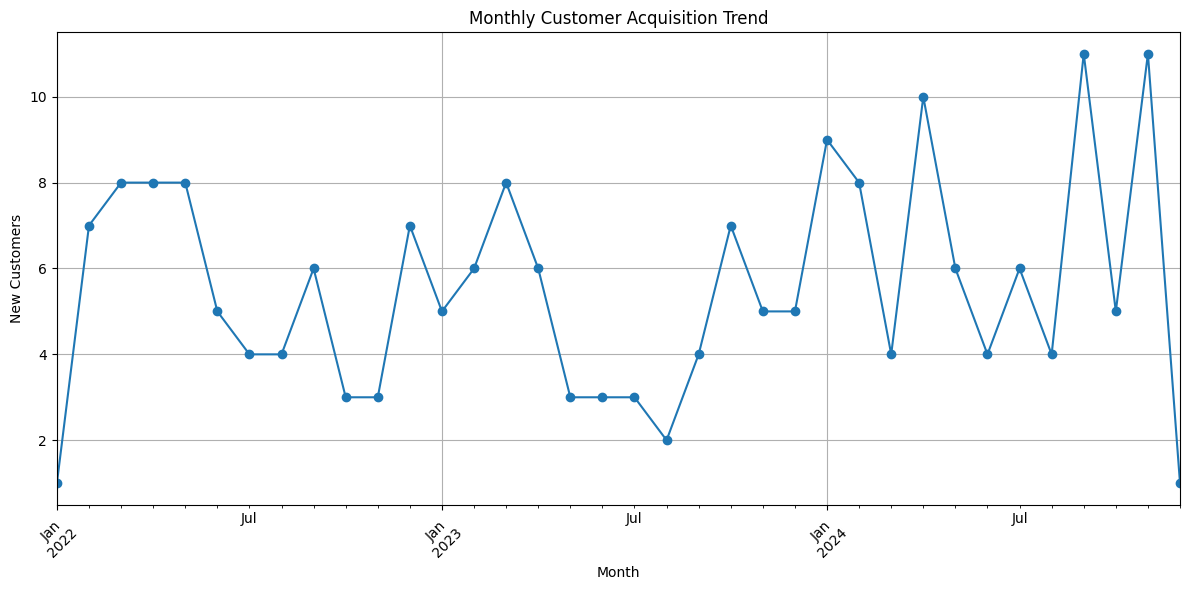

In [112]:
# Customer Acquisition Analysis
def analyze_customer_acquisition():
    # Monthly acquisition trends
    monthly_acquisitions = customers.groupby(
        customers["SignupDate"].dt.to_period("M")
    ).size()

    # Plot acquisition trend
    plt.figure(figsize=(12, 6))
    monthly_acquisitions.plot(kind="line", marker="o")
    plt.title("Monthly Customer Acquisition Trend")
    plt.xlabel("Month")
    plt.ylabel("New Customers")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

analyze_customer_acquisition()

### Customer lifetime value

In [117]:
def calculate_clv():
    customer_transactions = transactions.groupby("CustomerID").agg(
        {"TotalValue": "sum", "TransactionDate": ["count", "min", "max"]}
    )

    customer_transactions.columns = [
        "TotalSpent",
        "NumberTransactions",
        "FirstPurchase",
        "LastPurchase",
    ]

    customer_transactions["CustomerLifespan (days)"] = (
        customer_transactions["LastPurchase"] - customer_transactions["FirstPurchase"]
    ).dt.days

    customer_transactions["AverageOrderValue"] = (
        customer_transactions["TotalSpent"]
        / customer_transactions["NumberTransactions"]
    )

    return customer_transactions


clv_data = calculate_clv()

clv_data

,TotalSpent,NumberTransactions,FirstPurchase,LastPurchase,CustomerLifespan (days),AverageOrderValue
CustomerID,,,,,,
C0001,3354.52,5,2024-01-19 03:12:55,2024-11-02 17:04:16,288,670.904000
C0002,1862.74,4,2024-02-28 07:44:21,2024-12-03 01:41:41,278,465.685000
C0003,2725.38,4,2024-02-18 02:50:37,2024-08-24 18:54:04,188,681.345000
C0004,5354.88,8,2024-02-28 10:16:35,2024-12-23 14:13:52,299,669.360000
C0005,2034.24,3,2024-03-15 04:08:59,2024-11-04 00:30:22,233,678.080000
...,...,...,...,...,...,...
C0196,4982.88,4,2024-08-06 14:37:15,2024-12-15 03:43:35,130,1245.720000
C0197,1928.65,3,2024-01-13 04:52:09,2024-12-27 18:20:31,349,642.883333
C0198,931.83,2,2024-09-29 16:14:59,2024-10-04 18:31:12,5,465.915000
